<a href="https://colab.research.google.com/github/yashika-git/Fashion_MNIST_Keras/blob/main/Fashion_MNIST(starting_w_Keras).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow import keras 


In [ ]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()


In [ ]:
X_train_full.shape

(60000, 28, 28)

In [ ]:
X_train_full.dtype

dtype('uint8')

In [ ]:
X_valid, X_train = X_train_full[:5000] / 255.0, X_train_full[5000:] / 255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

In [ ]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
 "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

class_names[y_train[0]]

'Coat'

In [ ]:
model = keras.models.Sequential([
 keras.layers.Flatten(input_shape=[28, 28]),
 keras.layers.Dense(300, activation="relu"),
 keras.layers.Dense(100, activation="relu"),
 keras.layers.Dense(10, activation="softmax")
])


In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 300)               235500    
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.layers

In [ ]:
model.layers[1].name

'dense'

In [ ]:
model.compile(loss="sparse_categorical_crossentropy",
 optimizer="sgd",
 metrics=["accuracy"])

In [ ]:
history = model.fit(X_train, y_train, epochs=30,
 validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.7205 - accuracy: 0.7639 - val_loss: 0.5018 - val_accuracy: 0.8376
Epoch 2/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.4907 - accuracy: 0.8289 - val_loss: 0.4739 - val_accuracy: 0.8406
Epoch 3/30
1719/1719 [==============================] - 8s 4ms/step - loss: 0.4461 - accuracy: 0.8442 - val_loss: 0.4077 - val_accuracy: 0.8586
Epoch 4/30
1719/1719 [==============================] - 9s 5ms/step - loss: 0.4184 - accuracy: 0.8535 - val_loss: 0.4539 - val_accuracy: 0.8364
Epoch 5/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.3976 - accuracy: 0.8613 - val_loss: 0.4109 - val_accuracy: 0.8590
Epoch 6/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.3812 - accuracy: 0.8668 - val_loss: 0.3766 - val_accuracy: 0.8684
Epoch 7/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.3677 - accuracy: 0.8709 - val_loss: 0.3678 - val_accuracy:

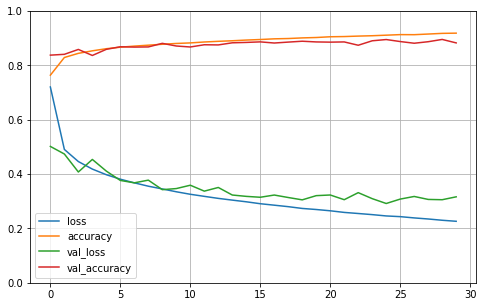

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()

In [ ]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 69.6589 - accuracy: 0.8353


[69.65889739990234, 0.8353000283241272]

In [ ]:
# making predictions
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(3)

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)